<a href="https://colab.research.google.com/github/jafar3369/Python/blob/main/YouTube_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
from google.colab import files
uploaded = files.upload()

Saving CAvideos.csv to CAvideos.csv
Saving DE_category_id.json to DE_category_id.json
Saving DEvideos.csv to DEvideos.csv
Saving Final.ipynb to Final.ipynb
Saving FR_category_id.json to FR_category_id.json
Saving FRvideos.csv to FRvideos.csv
Saving GB_category_id.json to GB_category_id.json
Saving GBvideos.csv to GBvideos.csv
Saving IN_category_id.json to IN_category_id.json
Saving INvideos.csv to INvideos.csv
Saving JP_category_id.json to JP_category_id.json
Saving JPvideos.csv to JPvideos.csv
Saving KR_category_id.json to KR_category_id.json
Saving KRvideos.csv to KRvideos.csv
Saving MX_category_id.json to MX_category_id.json
Saving MXvideos.csv to MXvideos.csv
Saving RUvideos.csv to RUvideos.csv
Saving US_category_id.json to US_category_id.json
Saving USvideos.csv to USvideos.csv


In [15]:
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import cm
from datetime import datetime
import glob
import os
import json
import pickle
import six
sns.set()
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.mode.chained_assignment = None

In [16]:
AllCSV = [i for i in glob.glob('*.{}'.format('csv'))]
AllCSV

['CAvideos.csv',
 'KRvideos.csv',
 'GBvideos.csv',
 'MXvideos.csv',
 'JPvideos.csv',
 'INvideos.csv',
 'USvideos.csv',
 'FRvideos.csv',
 'RUvideos.csv',
 'DEvideos.csv']

###all_dataframes = [] # list to store each data frame separately
df = pd.read_csv(AllCSV[0])
all_dataframes.append(df)
df = pd.read_csv(AllCSV[1])
all_dataframes.append(df)
df = pd.read_csv(AllCSV[2])
all_dataframes.append(df)
df = pd.read_csv(AllCSV[3])
all_dataframes.append(df)
df = pd.read_csv(AllCSV[4])
all_dataframes.append(df)
df = pd.read_csv(AllCSV[5],encoding= 'latin1')
all_dataframes.append(df)
df = pd.read_csv(AllCSV[6])
all_dataframes.append(df)

In [17]:
all_dataframes = [] # list to store each data frame separately
for csv in AllCSV:
    df = pd.read_csv(csv,encoding= 'latin1')
    df['country'] = csv[0:2] # adding column 'country' so that each dataset could be identified uniquely
    all_dataframes.append(df)
all_dataframes[0].head() # index 0 to 9 for [CA, DE, FR, GB, IN, JP, KR, MX, RU, US] datasets

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,CA
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,CA
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,CA
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,CA
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,CA


In [18]:
all_dataframes[0].info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40881 entries, 0 to 40880
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40881 non-null  object
 1   trending_date           40881 non-null  object
 2   title                   40881 non-null  object
 3   channel_title           40881 non-null  object
 4   category_id             40881 non-null  int64 
 5   publish_time            40881 non-null  object
 6   tags                    40881 non-null  object
 7   views                   40881 non-null  int64 
 8   likes                   40881 non-null  int64 
 9   dislikes                40881 non-null  int64 
 10  comment_count           40881 non-null  int64 
 11  thumbnail_link          40881 non-null  object
 12  comments_disabled       40881 non-null  bool  
 13  ratings_disabled        40881 non-null  bool  
 14  video_error_or_removed  40881 non-null  bool  
 15  de

In [19]:
for df in all_dataframes:
    # video_id 
    df['video_id'] = df['video_id'].astype('str') 
    
    # trending date
    df['trending_date'] = df['trending_date'].astype('str') 
    date_pieces = (df['trending_date']
                   .str.split('.')
                  )
    df['Year'] = date_pieces.str[0].astype(int)
    df['Day'] = date_pieces.str[1].astype(int)
    df['Month'] = date_pieces.str[2].astype(int)
    updatedyear = []
    df['Year'] = df['Year']+ 2000
    del df['trending_date']
    df['trending_date'] = pd.to_datetime(df[['Year', 'Month', 'Day']], format = "%Y-%m-%d")
    del df['Year']
    del df['Day']
    del df['Month']
    
    #title
    df['title'] = df['title'].astype('str')
    #channel_title
    df['channel_title'] = df['channel_title'].astype('str')
    #category_id
    df['category_id'] = df['category_id'].astype(str) 
    
    #tags
    df['tags'] = df['tags'].astype('str')
    
    # views, likes, dislikes, comment_count are already in correct data types i.e int64
    
    #thumbnail_link
    df['thumbnail_link'] = df['thumbnail_link'].astype('str') 
    
    #description
    df['description'] = df['description'].astype('str')
    
    # Changing comments_disabled, ratings_disabled, video_error_or_removed from bool to categorical
    df['comments_disabled'] = df['comments_disabled'].astype('category') 
    df['ratings_disabled'] = df['ratings_disabled'].astype('category') 
    df['video_error_or_removed'] = df['video_error_or_removed'].astype('category') 
    
    # publish_time 
    df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce', format='%Y-%m-%dT%H:%M:%S.%fZ')

In [20]:
for df in all_dataframes:
    df.insert(4, 'publish_date', df['publish_time'].dt.date) # loc, column name, values for column to be inserted
    df['publish_time'] = df['publish_time'].dt.time

In [21]:
all_dataframes[1].dtypes


video_id                          object
title                             object
channel_title                     object
category_id                       object
publish_date                      object
publish_time                      object
tags                              object
views                              int64
likes                              int64
dislikes                           int64
comment_count                      int64
thumbnail_link                    object
comments_disabled               category
ratings_disabled                category
video_error_or_removed          category
description                       object
country                           object
trending_date             datetime64[ns]
dtype: object

In [22]:
for df in all_dataframes:
    df.set_index('video_id', inplace=True)

In [23]:
for df in all_dataframes:
    a =df.isnull().sum()
a

title                     0
channel_title             0
category_id               0
publish_date              0
publish_time              0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
thumbnail_link            0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
description               0
country                   0
trending_date             0
dtype: int64

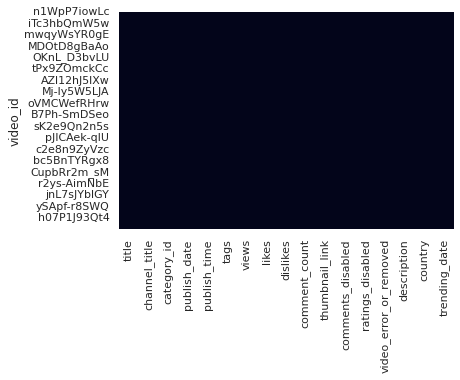

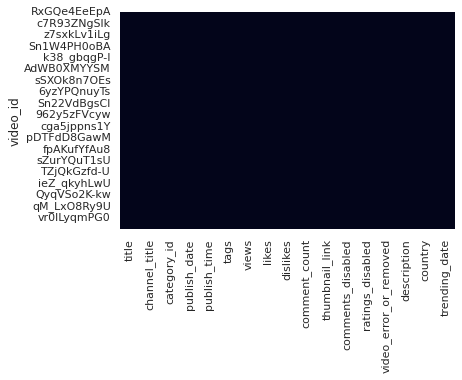

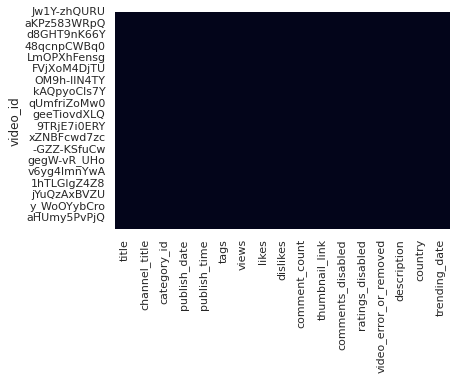

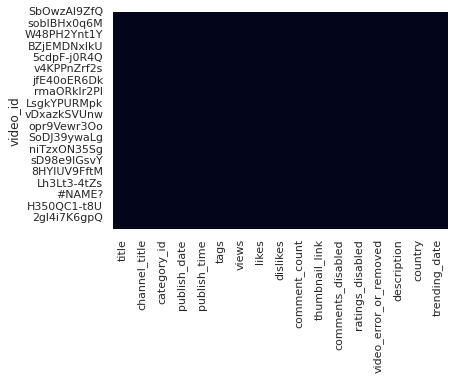

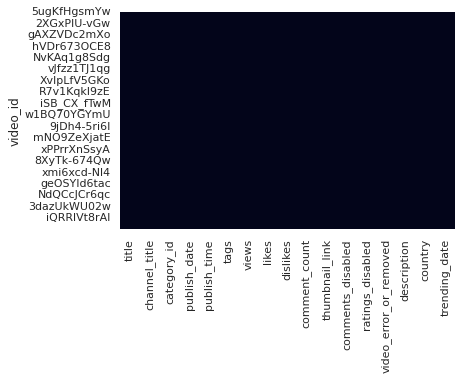

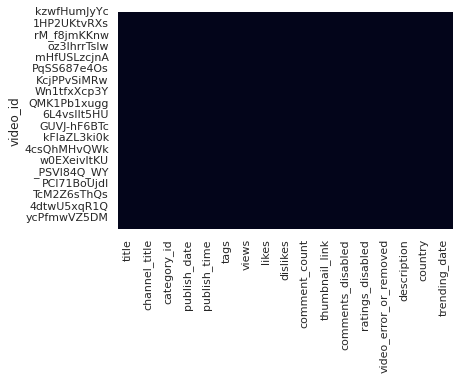

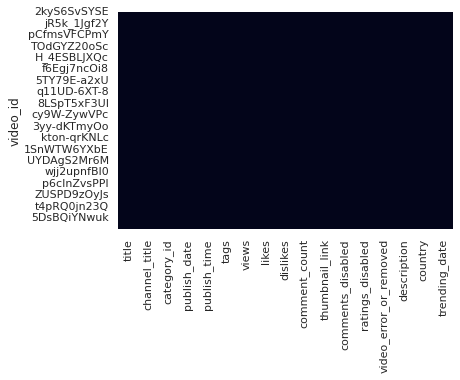

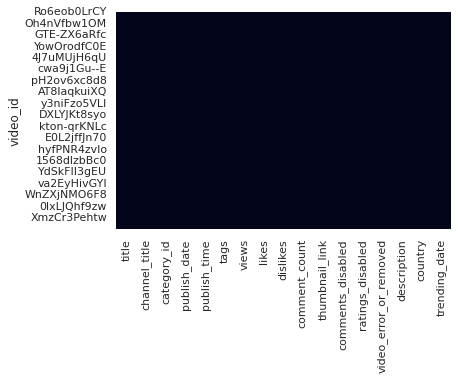

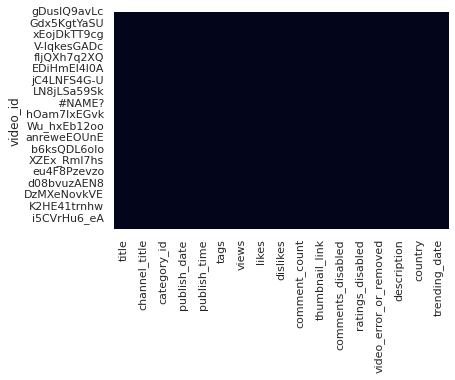

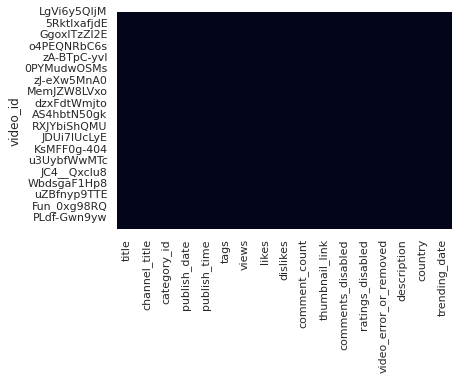

<Figure size 432x288 with 0 Axes>

In [24]:
for df in all_dataframes:
    sns.heatmap(df.isnull(), cbar=False)
    plt.figure()

In [25]:
combined_df = pd.concat(all_dataframes)


In [26]:
backup_df = combined_df

In [27]:
combined_df.head(5)

,title,channel_title,category_id,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,trending_date
video_id,,,,,,,,,,,,,,,,,
n1WpP7iowLc,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10,17:00:03,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,CA,2017-11-14
0dBIkQ4Mz1M,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13,17:00:00,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,CA,2017-11-14
5qpjK5DgCt4,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12,19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,CA,2017-11-14
d380meD0W0M,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12,18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,CA,2017-11-14
2Vv-BfVoq4g,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09,11:04:14,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,CA,2017-11-14


In [ ]:
combined_df.head(5)

In [28]:
# Sorting according to latest trending date while removing duplicates
combined_df = combined_df.reset_index().sort_values('trending_date', ascending=False).drop_duplicates('video_id',keep='first').set_index('video_id')

In [29]:
# Printing results
combined_df[['publish_date','publish_time','trending_date', 'country']].head()

,publish_date,publish_time,trending_date,country
video_id,,,,
go-F6xvezAM,2018-06-13,15:02:15,2018-06-14,DE
ZHbT3LWwsQ0,2018-06-12,18:09:35,2018-06-14,US
PjTU0DmBWiU,2018-06-13,12:30:01,2018-06-14,IN
TIE92mUvSsw,2018-06-11,06:50:41,2018-06-14,IN
-QPdRfqTnt4,2018-06-13,07:00:00,2018-06-14,US


In [30]:
ALLJSON = glob.glob('*.{}'.format('json'))

In [31]:
ALLJSON

['IN_category_id.json',
 'GB_category_id.json',
 'FR_category_id.json',
 'JP_category_id.json',
 'DE_category_id.json',
 'MX_category_id.json',
 'KR_category_id.json',
 'US_category_id.json']

In [32]:
# read file
with open('US_category_id.json', 'r') as f:  # reading one randomly selected json files to make sense of its contents
    data = f.read()
# parse file
obj = json.loads(data)
# printing
obj

{'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJvJAAShlR6hM"',
 'items': [{'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
   'id': '1',
   'kind': 'youtube#videoCategory',
   'snippet': {'assignable': True,
    'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Film & Animation'}},
  {'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/UZ1oLIIz2dxIhO45ZTFR3a3NyTA"',
   'id': '2',
   'kind': 'youtube#videoCategory',
   'snippet': {'assignable': True,
    'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Autos & Vehicles'}},
  {'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/nqRIq97-xe5XRZTxbknKFVe5Lmg"',
   'id': '10',
   'kind': 'youtube#videoCategory',
   'snippet': {'assignable': True,
    'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Music'}},
  {'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/HwXKamM1Q20q9BN-oBJavSGkfDI"',
   'id': '15',
   'kind': 'youtube#videoCategory',
   'snippet': {'assignable': True,
    'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Pet

In [33]:
category_id = {}
with open('DE_category_id.json', 'r') as f:
    d = json.load(f)
    for category in d['items']:
        category_id[category['id']] = category['snippet']['title']  

In [34]:
category1 = d['items'][0]['id']
category1

'1'

In [35]:
combined_df.head()

,title,channel_title,category_id,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,trending_date
video_id,,,,,,,,,,,,,,,,,
go-F6xvezAM,ÐÐ¸ÑÐ¾ÑÐºÑÑÐµÑ - ÐÐ·Ð±ÑÐºÐ° Ð£ÑÐ°Ð»Ñ...,Ð£ÑÐ°Ð»ÑÑÐºÐ¸Ðµ ÐÐµÐ»ÑÐ¼ÐµÐ½Ð¸,23,2018-06-13,15:02:15,"ÐÐ¸ÑÐ¾ÑÐºÑÑÐµÑ|""ÑÑÐ°Ð»ÑÑÐºÐ¸Ðµ Ð¿ÐµÐ...",316328,11394,352,550,https://i.ytimg.com/vi/go-F6xvezAM/default.jpg,False,False,False,ÐÐ¾Ð¿ÑÐ»ÑÑÐ½ÑÐ¹ Ð½Ð¾Ð¼ÐµÑ Ð¸Ð· Ð½Ð¾Ð²Ð¾Ð...,DE,2018-06-14
ZHbT3LWwsQ0,Film Theory: How To SAVE Jurassic Park (Jurass...,The Film Theorists,1,2018-06-12,18:09:35,"Jurassic|""jurassic world""|""jurassic park""|""jur...",2142891,72620,1985,11349,https://i.ytimg.com/vi/ZHbT3LWwsQ0/default.jpg,False,False,False,Watch Us Make A Jurassic Fossil Cake! âº http...,US,2018-06-14
PjTU0DmBWiU,PRADA - JASS MANAK (Official Video) Satti Dhil...,Geet MP3,24,2018-06-13,12:30:01,"prada|""prada song video""|""prada full song""|""pr...",3233766,279457,3762,30611,https://i.ytimg.com/vi/PjTU0DmBWiU/default.jpg,False,False,False,Geet MP3 & GK.DIGITAL Presenting Official Musi...,IN,2018-06-14
TIE92mUvSsw,Dhadak | Official Trailer | Janhvi & Ishaan | ...,Dharma Productions,1,2018-06-11,06:50:41,"Dharma|""Dharma Productions""|""Dhadak""|""Janhvi K...",27696924,468469,60026,48740,https://i.ytimg.com/vi/TIE92mUvSsw/default.jpg,False,False,False,"When two worlds collide, they become oneDhadak...",IN,2018-06-14
-QPdRfqTnt4,Dumbo Official Teaser Trailer,Disney Movie Trailers,1,2018-06-13,07:00:00,"Disney|""Walt Disney Studios""|""Dumbo""|""Flying E...",4427381,96391,5508,12726,https://i.ytimg.com/vi/-QPdRfqTnt4/default.jpg,False,False,False,Watch the teaser trailer for Tim Burtonâs al...,US,2018-06-14


In [36]:
combined_df.insert(2, 'category', combined_df['category_id'].map(category_id))

In [37]:
combined_df1 = combined_df

In [38]:
combined_df1['category'] = combined_df['category_id'].map(category_id)

In [39]:
combined_df1.head()

,title,channel_title,category,category_id,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,trending_date
video_id,,,,,,,,,,,,,,,,,,
go-F6xvezAM,ÐÐ¸ÑÐ¾ÑÐºÑÑÐµÑ - ÐÐ·Ð±ÑÐºÐ° Ð£ÑÐ°Ð»Ñ...,Ð£ÑÐ°Ð»ÑÑÐºÐ¸Ðµ ÐÐµÐ»ÑÐ¼ÐµÐ½Ð¸,Comedy,23,2018-06-13,15:02:15,"ÐÐ¸ÑÐ¾ÑÐºÑÑÐµÑ|""ÑÑÐ°Ð»ÑÑÐºÐ¸Ðµ Ð¿ÐµÐ...",316328,11394,352,550,https://i.ytimg.com/vi/go-F6xvezAM/default.jpg,False,False,False,ÐÐ¾Ð¿ÑÐ»ÑÑÐ½ÑÐ¹ Ð½Ð¾Ð¼ÐµÑ Ð¸Ð· Ð½Ð¾Ð²Ð¾Ð...,DE,2018-06-14
ZHbT3LWwsQ0,Film Theory: How To SAVE Jurassic Park (Jurass...,The Film Theorists,Film & Animation,1,2018-06-12,18:09:35,"Jurassic|""jurassic world""|""jurassic park""|""jur...",2142891,72620,1985,11349,https://i.ytimg.com/vi/ZHbT3LWwsQ0/default.jpg,False,False,False,Watch Us Make A Jurassic Fossil Cake! âº http...,US,2018-06-14
PjTU0DmBWiU,PRADA - JASS MANAK (Official Video) Satti Dhil...,Geet MP3,Entertainment,24,2018-06-13,12:30:01,"prada|""prada song video""|""prada full song""|""pr...",3233766,279457,3762,30611,https://i.ytimg.com/vi/PjTU0DmBWiU/default.jpg,False,False,False,Geet MP3 & GK.DIGITAL Presenting Official Musi...,IN,2018-06-14
TIE92mUvSsw,Dhadak | Official Trailer | Janhvi & Ishaan | ...,Dharma Productions,Film & Animation,1,2018-06-11,06:50:41,"Dharma|""Dharma Productions""|""Dhadak""|""Janhvi K...",27696924,468469,60026,48740,https://i.ytimg.com/vi/TIE92mUvSsw/default.jpg,False,False,False,"When two worlds collide, they become oneDhadak...",IN,2018-06-14
-QPdRfqTnt4,Dumbo Official Teaser Trailer,Disney Movie Trailers,Film & Animation,1,2018-06-13,07:00:00,"Disney|""Walt Disney Studios""|""Dumbo""|""Flying E...",4427381,96391,5508,12726,https://i.ytimg.com/vi/-QPdRfqTnt4/default.jpg,False,False,False,Watch the teaser trailer for Tim Burtonâs al...,US,2018-06-14


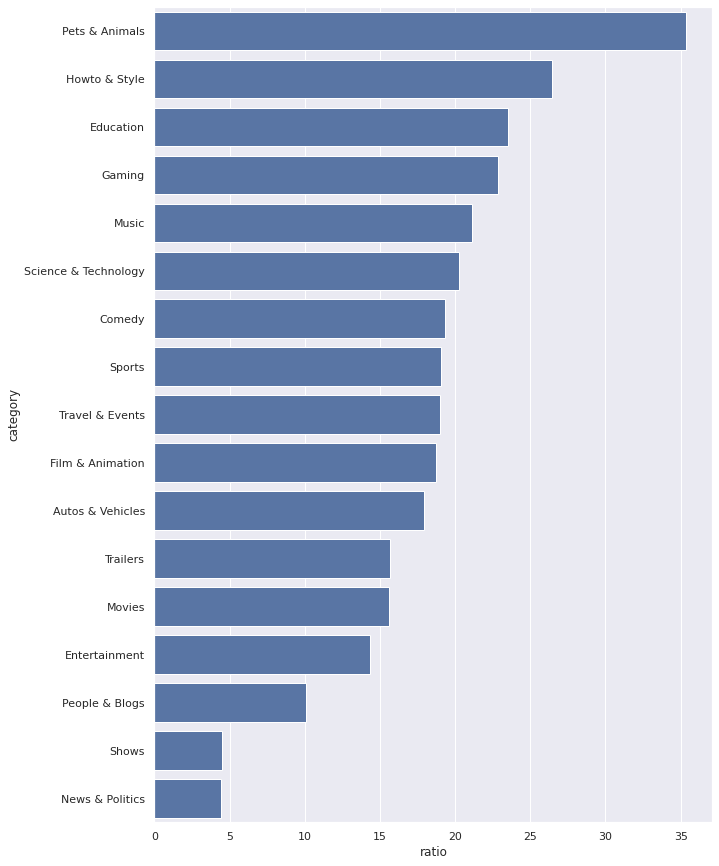

In [41]:
#Ratio of likes-dislikes in different categories

# calculating total likes for each category
likesdf = combined_df.groupby('category')['likes'].agg('sum')
# calculating total dislikes for each category
dislikesdf = combined_df.groupby('category')['dislikes'].agg('sum')
# calculating ratios of likes to dislikes
ratiodf = likesdf/dislikesdf 
# most liked category to appear on top
ratiodf = ratiodf.sort_values(ascending=False).reset_index()
# plotting bar chart
ratiodf.columns = ['category','ratio']
plt.subplots(figsize=(10, 15))
sns.barplot(x="ratio", y="category", data=ratiodf,
            label="Likes-Dislikes Ratio", color="b")

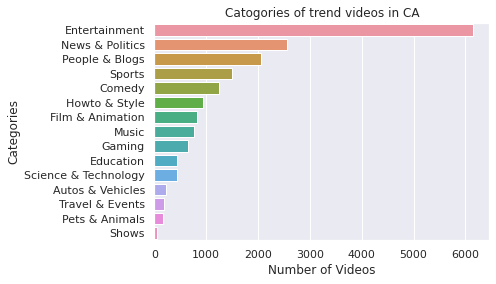

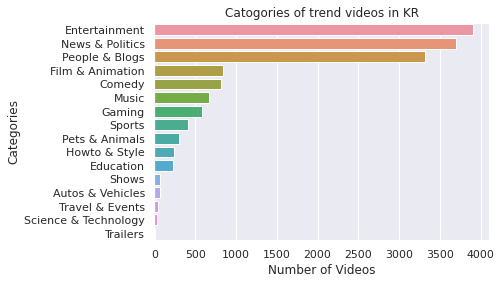

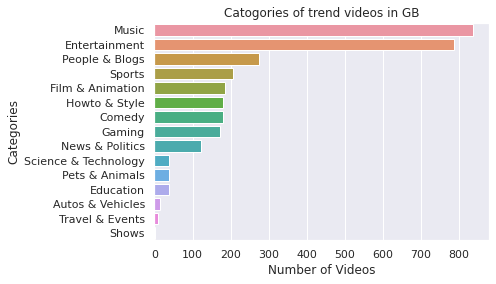

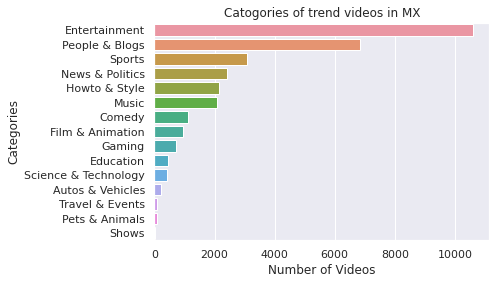

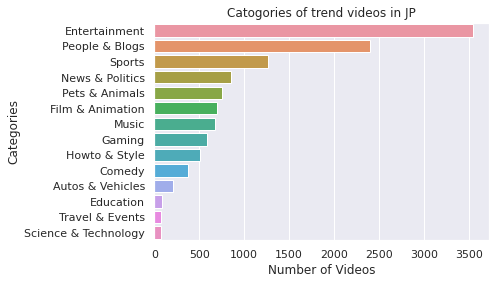

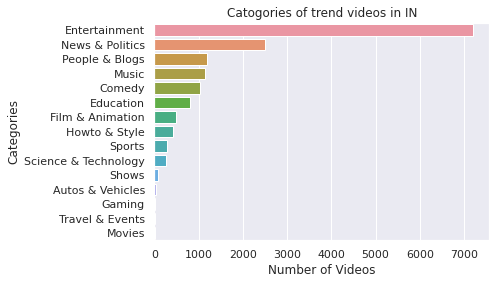

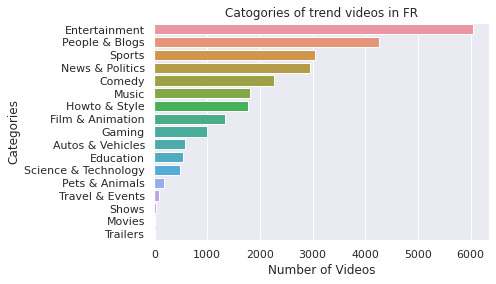

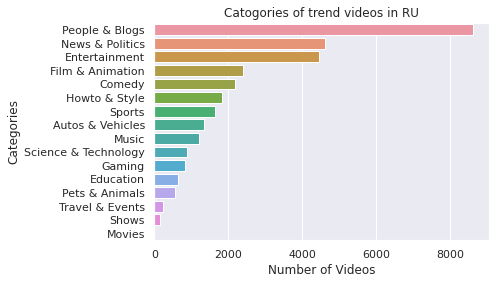

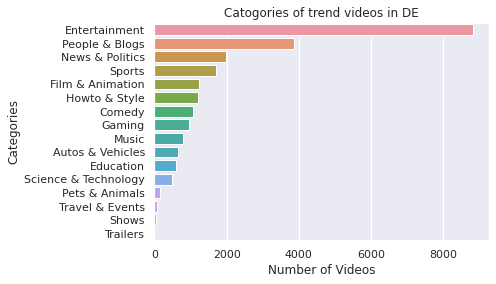

<Figure size 432x288 with 0 Axes>

In [44]:
#Users like videos from which category more?
# Getting names of all countries
countries = []
allcsv = [i for i in glob.glob('*.{}'.format('csv'))]
for csv in allcsv:
    c = csv[0:2]
    countries.append(c)
for country in countries:
    if country == 'US':
        tempdf = combined_df[combined_df['country']==country]['category'].value_counts().reset_index()
        ax = sns.barplot(y=tempdf['index'], x=tempdf['category'], data=tempdf, orient='h')
        plt.xlabel("Number of Videos")
        plt.ylabel("Categories")
        plt.title("Catogories of trend videos in " + country)
    else:
        tempdf = combined_df[combined_df['country']==country]['category'].value_counts().reset_index()
        ax = sns.barplot(y=tempdf['index'], x=tempdf['category'], data=tempdf, orient='h')
        plt.xlabel("Number of Videos")
        plt.ylabel("Categories")
        plt.title("Catogories of trend videos in " + country)
        plt.figure()

In [46]:
#Top 5 videos that are on trending in each country?

temporary = []
for df in all_dataframes:
    temp = df
    temp = temp.reset_index().sort_values(by = ['views'], ascending=False)
    temp.drop_duplicates(subset ="video_id", keep = 'first', inplace = True)
    temp.set_index('video_id', inplace=True)
    temp = temp.head(5) # top 5 that are on trending
    temporary.append(temp)
# Printing 3 randomly selected countries
temporary[2][['title', 'channel_title', 'views', 'likes']]

,title,channel_title,views,likes
video_id,,,,
_I_D_8Z4sJE,Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...,NickyJamTV,424538912,2818771
9jI-z9QN6g8,"Te Bote Remix - Casper, Nio GarcÃ­a, Darell, N...",Flow La Movie,337621571,2581961
kLpH1nSLJSs,Bad Bunny - Amorfoda | Video Oficial,Bad Bunny,328860380,3823879
wfWkmURBNv8,Ozuna x Romeo Santos - El Farsante Remix,Ozuna,288811992,1618180
VYOjWnS4cMY,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,259721696,5444541


In [49]:
df.head()

,title,channel_title,category_id,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,trending_date
video_id,,,,,,,,,,,,,,,,,
LgVi6y5QIjM,Sing zu Ende! | Gesangseinlagen vom Feinsten |...,inscope21,24,2017-11-13,17:08:49,"inscope21|""sing zu ende""|""gesangseinlagen""|""ge...",252786,35885,230,1539,https://i.ytimg.com/vi/LgVi6y5QIjM/default.jpg,False,False,False,Heute gibt es mal wieder ein neues Format... w...,DE,2017-11-14
Bayt7uQith4,Kinder ferngesteuert im Kiosk! Erwachsene abzo...,LUKE! Die Woche und ich,23,2017-11-12,22:30:01,"Kinder|""ferngesteuert""|""Kinder ferngesteuert""|...",797196,53576,302,1278,https://i.ytimg.com/vi/Bayt7uQith4/default.jpg,False,False,False,Kinder ferngesteuert! Kinder lassen sich sooo ...,DE,2017-11-14
1ZAPwfrtAFY,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13,07:30:00,"last week tonight trump presidency|""last week ...",2418783,97190,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",DE,2017-11-14
AHtypnRk7JE,Das Fermi-Paradoxon,100SekundenPhysik,27,2017-11-12,15:00:01,"Physik|""Wissenschaft""|""Technik""|""Science-Ficti...",380247,31821,458,1955,https://i.ytimg.com/vi/AHtypnRk7JE/default.jpg,False,False,False,âºAlle Videos: http://bit.ly/1fa7Tw3\n\n\nâ...,DE,2017-11-14
ZJ9We4bjcg0,18 SONGS mit Kelly MissesVlog (Sing-off),rezo,24,2017-11-12,13:10:36,"kelly|""missesvlog""|""kelly song""|""bausa""|""bausa...",822213,100684,2467,10244,https://i.ytimg.com/vi/ZJ9We4bjcg0/default.jpg,False,False,False,18 Song Mashup Ã¼ber den (verÃ¤nderten) Beat v...,DE,2017-11-14


In [50]:
temporary = [] # to store results for each country
for df in all_dataframes:
    temp = df
    temp = temp.reset_index().sort_values(by = ['likes'], ascending=False)
    temp.drop_duplicates(subset ="video_id", keep = 'first', inplace = True)
    temp.set_index('video_id', inplace=True)
    temp = temp.head(5) # top 5 that are most liked
    temporary.append(temp)
# Printing 3 randomly selected results
temporary[0][['views', 'likes']]

,views,likes
video_id,,
7C2z4GqqS5E,80738011,5053338
VYOjWnS4cMY,98938809,3037318
FlsCjmMhFmw,137843120,3014479
6ZfuNTqbHE8,89930713,2606665
kTlv5_Bs8aw,27670973,2542863


In [51]:
temp = combined_df
temp = temp.groupby('category')['views', 'likes'].apply(lambda x: x.astype(int).sum())
temp = temp.sort_values(by='likes', ascending=False).head()
temp

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,views,likes
category,,
Entertainment,17587874456,471898590
Music,18175205319,444810342
Comedy,4573397557,218752076
People & Blogs,5606736758,157767524
Howto & Style,2215632547,77250719


In [54]:
#Users comment on which category the most?

temp = combined_df
temp = temp.groupby('category')['views','likes', 'comment_count'].apply(lambda x: x.astype(int).sum())
temp = temp.sort_values(by='comment_count', ascending=False).head()
temp

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


,views,likes,comment_count
category,,,
Entertainment,17587874456,471898590,68372706
Music,18175205319,444810342,36232013
People & Blogs,5606736758,157767524,24662982
Comedy,4573397557,218752076,23294928
News & Politics,3470700613,53467985,14956887


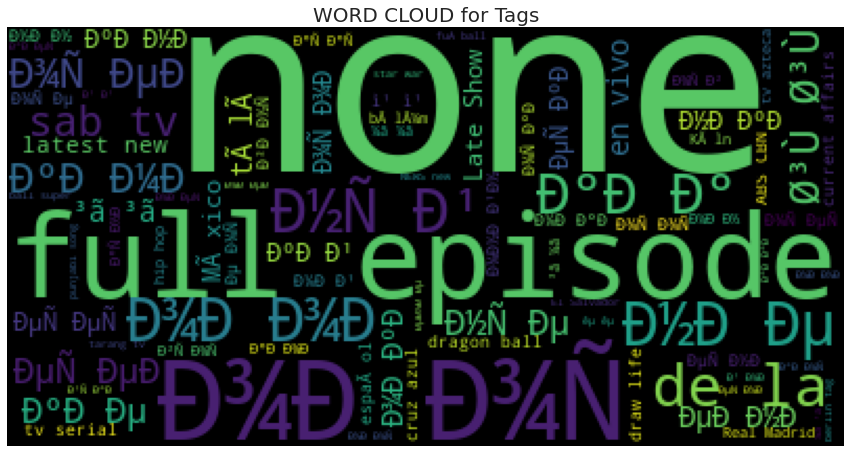

In [57]:
# For tags
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline  
plt.figure(figsize = (15, 15))
stopwords = set(STOPWORDS)
wordcloud = WordCloud(
background_color = 'black', stopwords = stopwords, max_words = 1000, max_font_size = 120, random_state = 42 ).generate(str(combined_df['tags']))
plt.imshow(wordcloud)
plt.title('WORD CLOUD for Tags', fontsize = 20)
plt.axis('off')
plt.show()